In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [10]:
#데이터 불러오기
dataset = pd.read_csv('./colon_cancer_dataset.csv')
dataset.head()

,ID_REF,GSM1077598,GSM1077599,GSM1077600,GSM1077601,GSM1077602,GSM1077603,GSM1077604,GSM1077605,GSM1077606,...,GSM1077834,GSM1077835,GSM1077836,GSM1077837,GSM1077838,GSM1077839,GSM1077840,GSM1077841,GSM1077842,GSM1077843
0,11715100_at,3.6599,2.5712,3.3174,3.1835,2.9949,3.4481,3.1692,3.5142,2.7073,...,3.2312,4.4599,3.8468,3.8416,4.2620,2.7624,2.5775,3.1441,4.8256,3.3535
1,11715101_s_at,4.1524,4.1879,4.1040,4.3635,4.5227,4.1203,4.2486,4.1462,3.8748,...,3.8795,5.7232,4.7099,4.0111,4.9795,3.7898,3.7737,4.3357,5.4895,4.4803
2,11715102_x_at,3.3896,3.1228,3.2434,3.1175,3.3627,2.8233,3.4594,3.1960,3.1082,...,3.3990,5.1110,4.2058,3.2759,4.4833,3.0972,2.7807,3.4050,4.4170,3.2669
3,11715103_x_at,3.8929,3.7299,4.1048,3.3426,3.3376,3.0590,3.2893,3.2290,2.9375,...,3.7911,3.1532,4.2702,3.4329,3.5422,4.3038,3.2338,3.4187,4.6358,4.1998
4,11715104_s_at,7.3799,7.7642,6.4705,7.0046,6.9029,6.1424,6.5051,6.4659,6.6958,...,2.6693,2.6769,2.7843,2.6698,2.8176,3.0904,2.6377,3.0226,2.7754,2.3838


In [11]:
dataset = dataset.transpose()
dataset = dataset.rename(columns=dataset.iloc[0])
dataset.drop(dataset.index[0], inplace=True)
dataset.drop(dataset.columns[-1], axis=1, inplace = True)
dataset.isnull().sum().sum()
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, GSM1077598 to GSM1077843
Columns: 49386 entries, 11715100_at to AFFX-TrpnX-M_at
dtypes: object(49386)
memory usage: 92.7+ MB


,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,...,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM1077598,3.6599,4.1524,3.3896,3.8929,7.3799,2.0732,2.8276,2.6345,2.5165,2.4795,...,1.9475,2.1732,2.3173,2.0892,7.0313,4.8902,5.9995,2.1907,2.1474,2.1102
GSM1077599,2.5712,4.1879,3.1228,3.7299,7.7642,2.3151,2.8944,2.402,2.5873,2.2066,...,1.9056,1.9503,2.0665,2.0585,7.3201,5.2443,6.2646,1.9371,2.2677,2.3093
GSM1077600,3.3174,4.104,3.2434,4.1048,6.4705,2.1824,2.7407,2.4271,2.5785,2.6003,...,2.507,2.4232,2.4662,2.2127,8.027,5.814,6.3628,2.1923,2.2233,2.2221
GSM1077601,3.1835,4.3635,3.1175,3.3426,7.0046,2.1961,2.471,2.2932,2.3527,2.4741,...,2.0228,2.7202,2.4453,2.3259,7.1081,4.7067,5.1356,2.0068,2.2773,2.2656
GSM1077602,2.9949,4.5227,3.3627,3.3376,6.9029,2.5087,2.8609,2.4833,2.3683,2.3747,...,1.9309,2.1284,2.6587,2.4271,7.7353,5.2432,6.1207,2.1847,2.303,2.1275


In [12]:
dataset = dataset.astype(float)


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, GSM1077598 to GSM1077843
Columns: 49386 entries, 11715100_at to AFFX-TrpnX-M_at
dtypes: float64(49386)
memory usage: 92.7+ MB


In [14]:
dataset['label'] = 0
label=dataset['label'].copy()
label[50:] = 1
dataset['label'] = label
print(dataset.sample(10))

            11715100_at  11715101_s_at  11715102_x_at  11715103_x_at  \
GSM1077709       3.2254         3.9726         3.5545         3.3030   
GSM1077800       2.3269         3.1299         2.5957         3.2958   
GSM1077671       3.2287         3.9501         3.4721         3.2566   
GSM1077706       3.3393         3.3633         2.9115         3.7855   
GSM1077787       4.3524         4.2284         3.5407         4.0740   
GSM1077654       3.3437         4.1059         3.4619         3.1868   
GSM1077703       3.0975         3.6471         3.1603         3.3734   
GSM1077699       2.7608         4.1047         3.2845         3.7064   
GSM1077658       3.9125         4.6021         3.5206         3.5056   
GSM1077697       2.7018         3.6255         2.9101         3.6305   

            11715104_s_at  11715105_at  11715106_x_at  11715107_s_at  \
GSM1077709         7.7440       2.2524         3.1468         2.5168   
GSM1077800         2.6036       2.2401         2.4668         2

In [15]:
#각각의 label이 몇 개의 데이터로 이루어져있는지 확인
dataset['label'].value_counts()

1    196
0     50
Name: label, dtype: int64

In [16]:
X = dataset.drop(['label'], axis=1)
y = dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 )
print(X)
print(y)
dataset.info()

            11715100_at  11715101_s_at  11715102_x_at  11715103_x_at  \
GSM1077598       3.6599         4.1524         3.3896         3.8929   
GSM1077599       2.5712         4.1879         3.1228         3.7299   
GSM1077600       3.3174         4.1040         3.2434         4.1048   
GSM1077601       3.1835         4.3635         3.1175         3.3426   
GSM1077602       2.9949         4.5227         3.3627         3.3376   
...                 ...            ...            ...            ...   
GSM1077839       2.7624         3.7898         3.0972         4.3038   
GSM1077840       2.5775         3.7737         2.7807         3.2338   
GSM1077841       3.1441         4.3357         3.4050         3.4187   
GSM1077842       4.8256         5.4895         4.4170         4.6358   
GSM1077843       3.3535         4.4803         3.2669         4.1998   

            11715104_s_at  11715105_at  11715106_x_at  11715107_s_at  \
GSM1077598         7.3799       2.0732         2.8276         2

In [17]:
#SMOTE 오버샘플링 적용

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(y_train.value_counts())
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print(y_train_over.value_counts())

1    139
0     33
Name: label, dtype: int64
SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (172, 49386) (172,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (278, 49386) (278,)
1    139
0    139
Name: label, dtype: int64


In [18]:
#랜덤 포레스트 예측
rf_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 100)
rf_clf.fit(X_train_over, y_train_over)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

In [19]:
print('accuracy : ', accuracy)

accuracy :  1.0


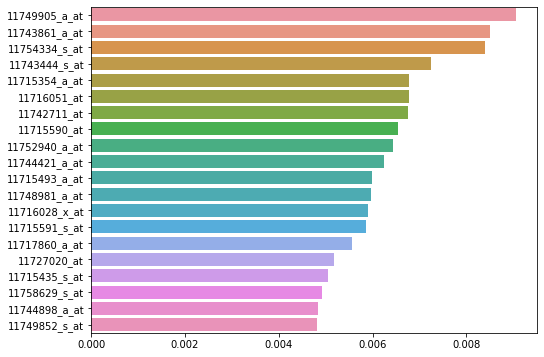

<class 'pandas.core.series.Series'>
Index: 20 entries, 11749905_a_at to 11749852_s_at
Series name: None
Non-Null Count  Dtype  
--------------  -----  
20 non-null     float64
dtypes: float64(1)
memory usage: 876.0+ bytes
None


In [20]:
#feature importance 분석
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train_over.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()
print(ftr_top20.info())

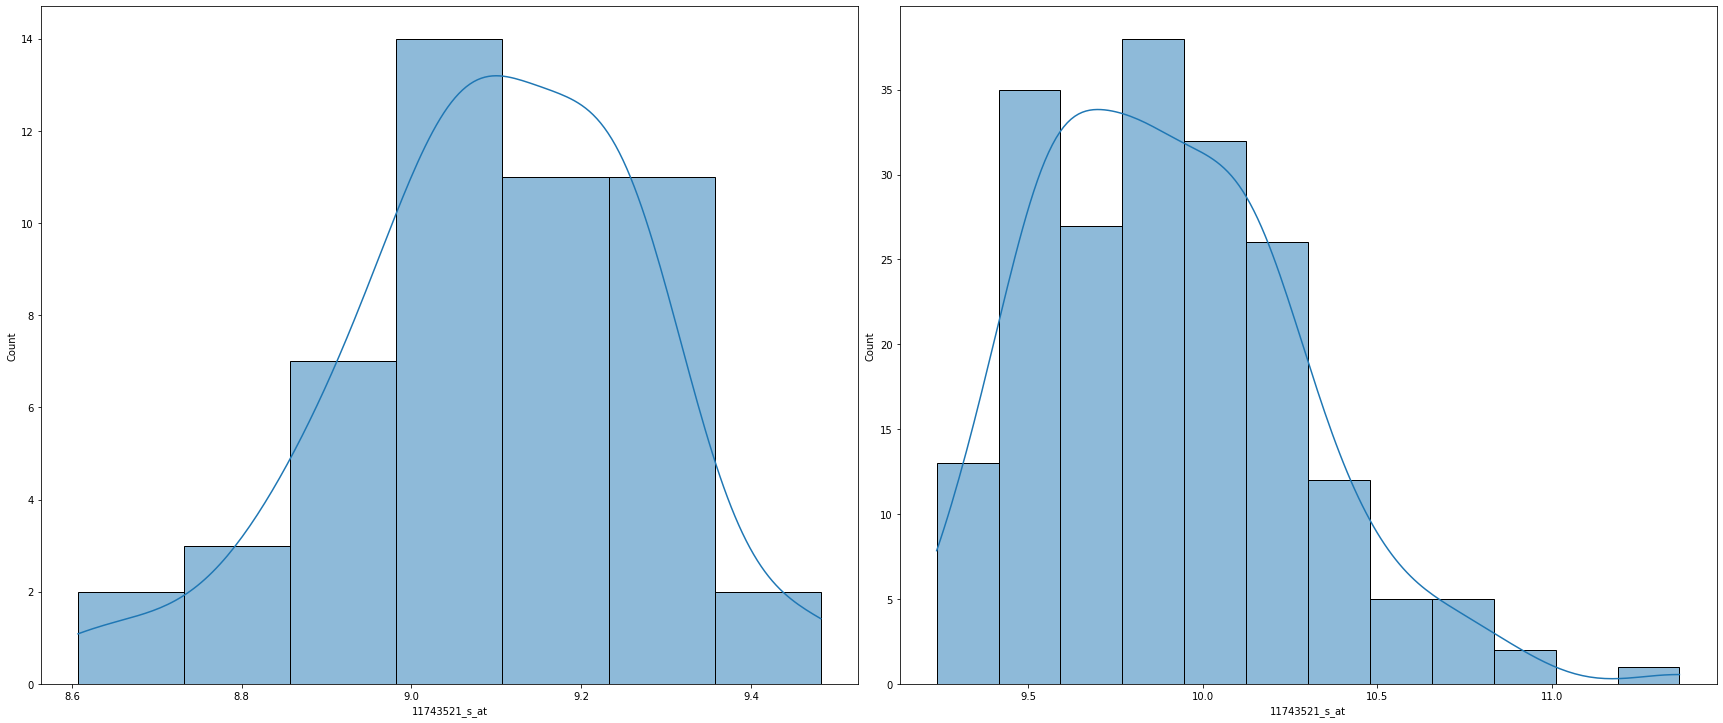

In [21]:
dataset_0 = dataset[dataset['label']==0]
dataset_1 = dataset[dataset['label']==1]
fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols = 2)
fig.tight_layout()
sns.histplot(dataset_0['11743521_s_at'], kde=True, ax = axs[0])
sns.histplot(dataset_1['11743521_s_at'], kde=True, ax = axs[1])
plt.show()

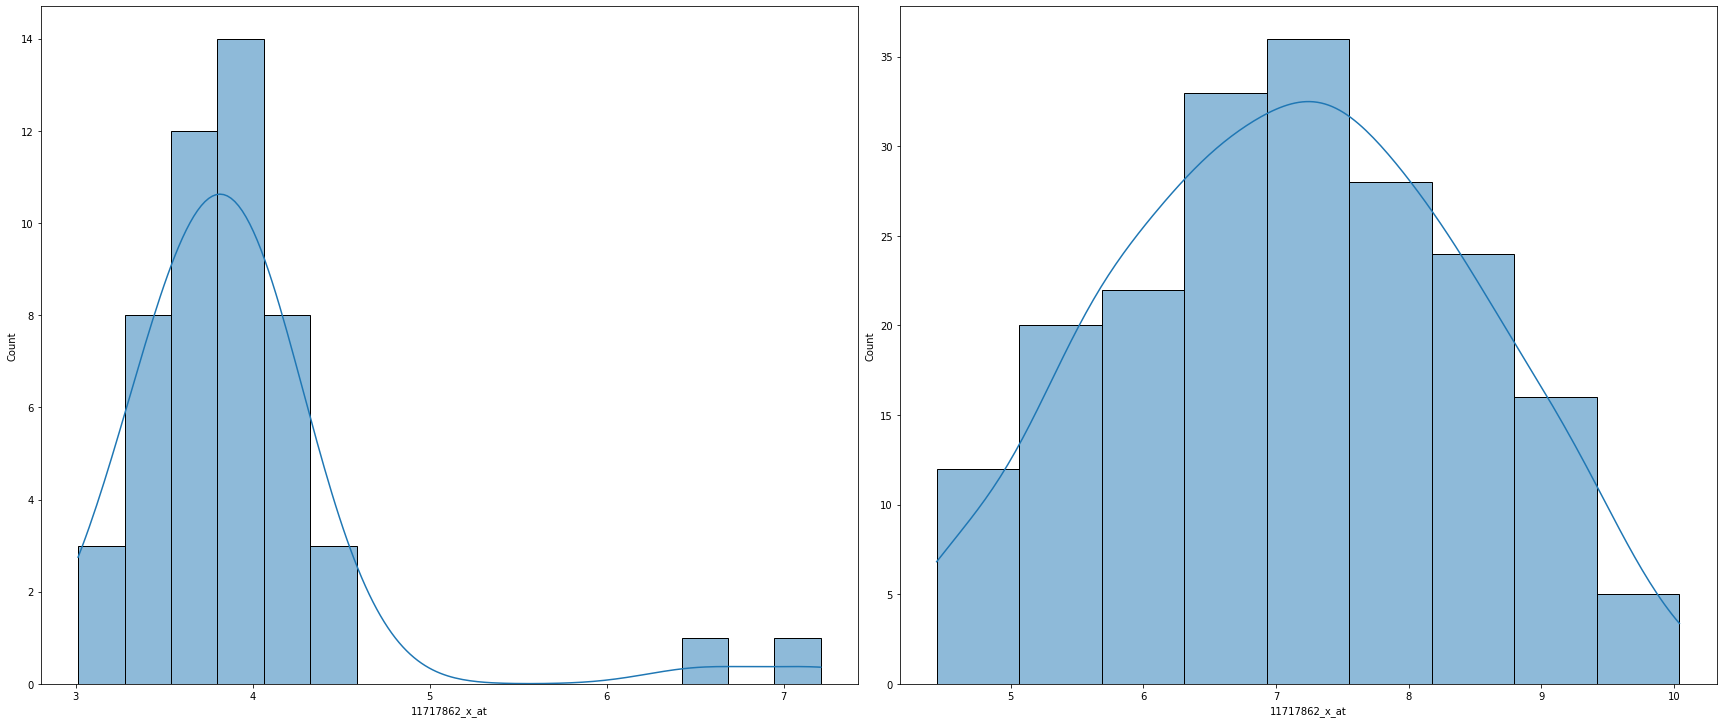

In [22]:
dataset_0 = dataset[dataset['label']==0]
dataset_1 = dataset[dataset['label']==1]
fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols = 2)
fig.tight_layout()
sns.histplot(dataset_0['11717862_x_at'], kde=True, ax = axs[0])
sns.histplot(dataset_1['11717862_x_at'], kde=True, ax = axs[1])
plt.show()